In [94]:
import numpy as np
import matplotlib.pyplot as plt
import json

### This file is used to generate the final plots, from the data saved during different experiments.

### Experiment 'experiment1.py'

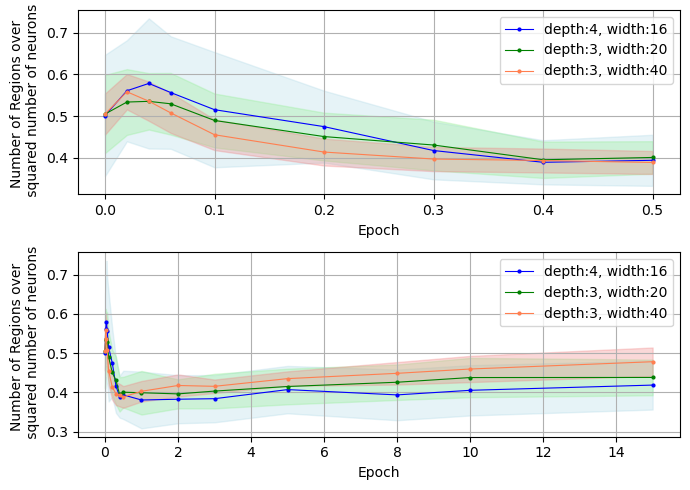

In [95]:
curves1 = np.load(r'replication_paper/2024-12-30/curves_4_16.npy')
curves2 = np.load(r'replication_paper/2024-12-30/curves_3_20.npy')
curves3 = np.load(r'replication_paper/2024-12-31/curves_3_40.npy')

curves = [curves1, curves2, curves3]
counts_vals = np.array([0, 0.02, 0.04, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 5, 8, 10, 15])

fig, axes = plt.subplots(2, 1, figsize=(7, 5))
params = [(4, 16), (3, 20), (3, 40)]
# closeup
colors = ['blue', 'green', 'coral']
for i in range(3):
    depth, width = params[i]
    n_neurons = depth * width
    curves_arr = np.array(curves[i])/((n_neurons)**2)
    mean_curve = np.mean(curves_arr, axis=0)
    std_dev = np.std(curves_arr, axis=0)
    axes[0].plot(counts_vals[:9], mean_curve[:9], label = f"depth:{depth}, width:{width}", linewidth=0.8, marker='.', markersize=4, color=colors[i])
    axes[0].fill_between(counts_vals[:9], mean_curve[:9] - std_dev[:9], mean_curve[:9] + std_dev[:9], color='light'+colors[i], alpha=0.3)
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Number of Regions over \n squared number of neurons")
    axes[0].legend()
    axes[0].grid(True)

    # Full
    axes[1].plot(counts_vals, mean_curve, label = f"depth:{depth}, width:{width}", linewidth=0.8, marker='.', markersize=4, color=colors[i])
    axes[1].fill_between(counts_vals, mean_curve - std_dev, mean_curve + std_dev, color='light'+colors[i], alpha=0.3)
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Number of Regions over \n squared number of neurons")
    axes[1].legend()
    axes[1].grid(True)

fig.tight_layout()
plt.show()

### Experiment 'count_regions_during_CL.py'

In [96]:
def plot_n_regions_CL(values, results, params, n_tasks=5):
    colors = ['blue', 'green', 'coral']
    plt.figure(figsize=(12, 6))
    for j in range(len(results)):
        depth, width = params[j]
        n_neurons = width * depth
        mean_curve = np.mean(results[j] / n_neurons**2, axis=2)
        std_dev = np.std(results[j] / n_neurons**2, axis=2)

        mean_curve = mean_curve.flatten()
        std_dev = std_dev.flatten()

        x_values = np.array([np.array(values) + i * (max(values)+1) for i in range(n_tasks)]).flatten()
        plt.plot(x_values, mean_curve, marker='.', markersize=4, color=colors[j], linestyle='-', linewidth=0.8, label=f'depth: {depth}, width: {width}')
        plt.fill_between(x_values, mean_curve - std_dev, mean_curve + std_dev, color='light'+colors[j], alpha=0.3)

    for i in range(n_tasks):
        task_label_position = np.mean(np.array(values) + i * max(values))
        plt.text(task_label_position,
                plt.ylim()[0] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]),
                f"Task {i + 1}",
                ha='center',
                va='top',
                fontsize=15,
                color='black')

    plt.xlabel('Epochs and tasks', fontsize=20)
    plt.ylabel('Number of regions \n over squared number of neurons', fontsize=20)
    custom_xticks = [0]
    custom_xtick_labels = ["0"]

    for i in range(n_tasks):
        xticks_for_task = np.array([15, 30, 50]) + i * (max(values)+1)
        custom_xticks.extend(xticks_for_task)
        if i == 0:
            custom_xtick_labels.extend([str(tick) for tick in [15, 30, 50]])
        else:
            custom_xtick_labels.extend([str(tick) for tick in [15, 30, 50]])
    plt.xticks(ticks=custom_xticks, labels=custom_xtick_labels, rotation=45, ha='right', fontsize=15)
    plt.yticks(fontsize=15)
    # set xlim
    plt.xlim([-2, n_tasks * max(values) + 6])
    plt.grid(alpha=0.3)
    plt.legend(fontsize=15)
    plt.tight_layout()
    plt.show()

- Plot results corresponding to LwF-MC model

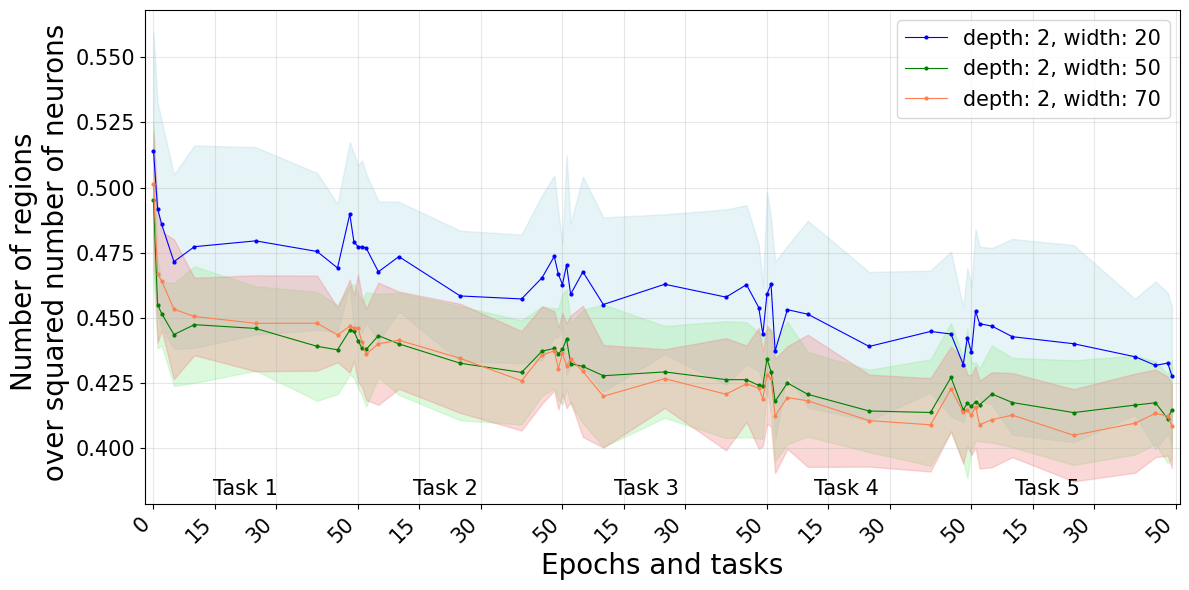

In [97]:
results1 = np.load(r'counting_regions_during_CL/2025-01-02/results_2_20_2025-01-02T12_26_40.npy')
results2 = np.load(r'counting_regions_during_CL/2025-01-02/results_2_50_2025-01-02T02_03_11.npy')
results3 = np.load(r'counting_regions_during_CL/2025-01-03/results_2_70_2025-01-03T13_38_19.npy')
params = [(2, 20), (2, 50), (2, 70)]    # (depth, width)
results = [results1, results2, results3]
count_values = [0, 1, 2, 5, 10, 25, 40, 45, 48, 49]

plot_n_regions_CL(count_values, results, params)

- Plot results corresponding to A-GEM model

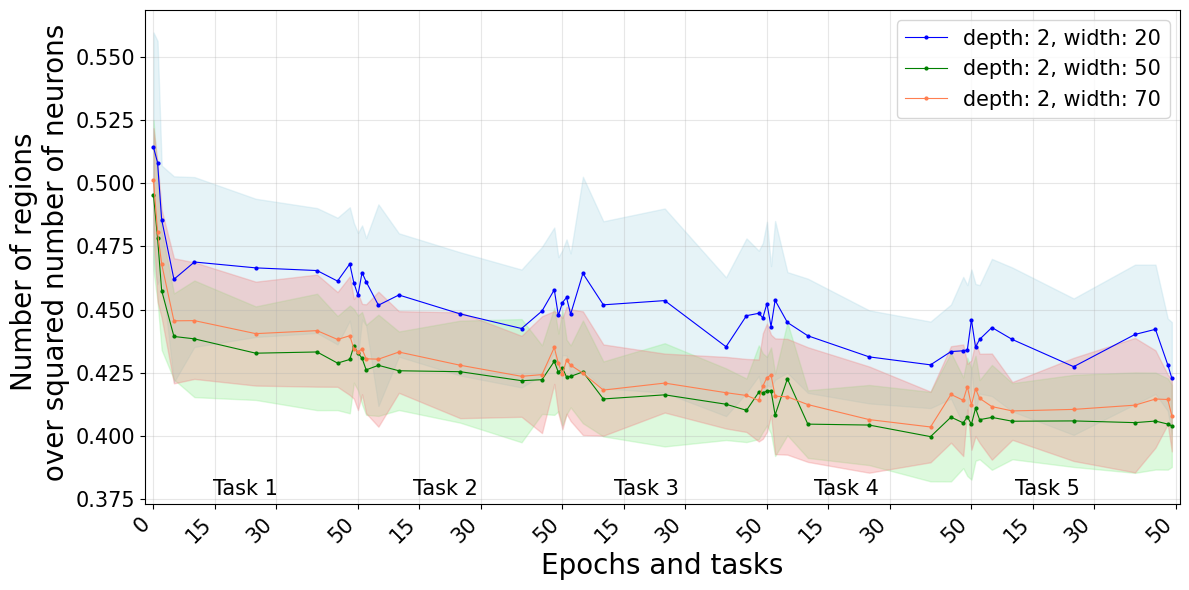

In [99]:
results1 = np.load(r'counting_regions_during_CL/2025-01-04/results_2_20_2025-01-04T15_32_38.npy')
results2 = np.load(r'counting_regions_during_CL/2025-01-05/results_2_50_2025-01-05T21_01_57.npy')
results3 = np.load(r'counting_regions_during_CL/2025-01-06/results_2_70_2025-01-06T22_49_40.npy')
params = [(2, 20), (2, 50), (2,70)]    # (depth, width)
results = [results1, results2, results3]
count_values = [0, 1, 2, 5, 10, 25, 40, 45, 48, 49]

plot_n_regions_CL(count_values, results, params)

### Experiment 'regions_and_accuracy.py'

In [100]:
with open(r'regions_and_accuracy/2025-01-05/accuracy_2_70_2025-01-05T15_40_51.json', "r") as file:
    accuracy = json.load(file)

results = np.load(r'counting_regions_during_CL/2025-01-03/results_2_70_2025-01-03T13_38_19.npy')

n_tasks = 5
n_exp = results.shape[2]
values = [0, 1, 2, 5, 10, 25, 40, 45, 48, 49]
acc = []
for i in range(n_tasks):
    acc_i = np.zeros((len(values) * (n_tasks - i), n_exp))
    for j in range(n_exp):
        acc_i[:, j] = [accuracy[f"exp_{j}"][f"task_{l+1}_epoch_{values[k]}"][i] for l in range(i, n_tasks)  for k in range(len(values))]
    acc.append(acc_i)

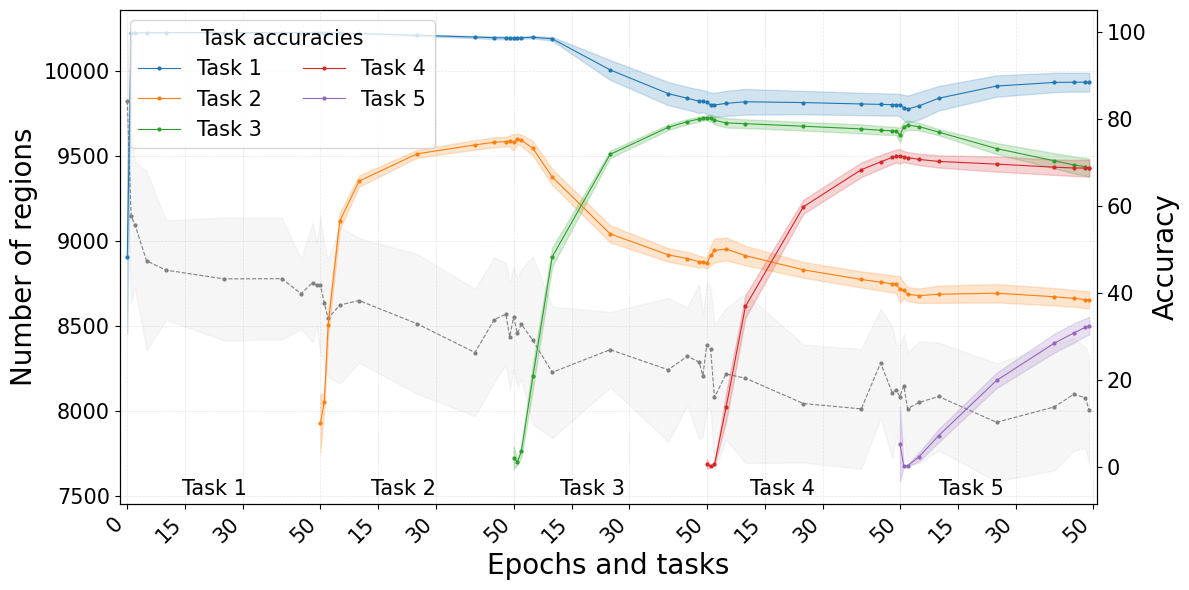

In [101]:
fig, ax1 = plt.subplots(figsize=(12, 6))
colors = plt.cm.tab10.colors

depth, width = (70, 2)
n_neurons = width * depth
mean_curve = np.mean(results, axis=2)
std_dev = np.std(results, axis=2)

mean_curve = mean_curve.flatten()
std_dev = std_dev.flatten()

x_values = np.array([np.array(values) + i * (max(values)+1) for i in range(n_tasks)]).flatten()
ax1.plot(x_values, mean_curve, marker='.', markersize=4, color='grey', linestyle='--', linewidth=0.8, label=f'depth: {depth}, width: {width}')
ax1.fill_between(x_values, mean_curve - std_dev, mean_curve + std_dev, color='lightgrey', alpha=0.2)

ax2 = ax1.twinx()
for k in range(n_tasks):
    acc_task_k = acc[k]
    mean_acc_task_k = np.mean(acc_task_k, axis=1)
    std_dev_acc_task_k = np.std(acc_task_k, axis=1)
    ax2.plot(x_values[k * 10:], mean_acc_task_k, marker='.', markersize=4, color=colors[k], linestyle='-', linewidth=0.8, label=f'Task {k+1}')
    ax2.fill_between(x_values[k * 10:], mean_acc_task_k - std_dev_acc_task_k, mean_acc_task_k + std_dev_acc_task_k, color=colors[k], alpha=0.2)

for i in range(n_tasks):
    task_label_position = np.mean(np.array(values) + i * max(values))
    ax1.text(task_label_position,
            ax1.get_ylim()[0] + 0.05 * (ax1.get_ylim()[1] - ax1.get_ylim()[0]),
            f"Task {i + 1}",
            ha='center',
            va='top',
            fontsize=15,
            color='black')
ax1.set_xlabel('Epochs and tasks', fontsize=20)
ax1.set_ylabel('Number of regions', fontsize=20)
ax2.set_ylabel('Accuracy', fontsize=20)

custom_xticks = [0]
custom_xtick_labels = ["0"]
for i in range(n_tasks):
    xticks_for_task = np.array([15, 30, 50]) + i * (max(values)+1)
    custom_xticks.extend(xticks_for_task)
    if i == 0:
        custom_xtick_labels.extend([str(tick) for tick in [15, 30, 50]])
    else:
        custom_xtick_labels.extend([str(tick) for tick in [15, 30, 50]])
ax1.set_xticks(ticks=custom_xticks, labels=custom_xtick_labels, rotation=45, ha='right', fontsize=15)
ax2.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax1.set_xlim([-2, n_tasks * max(values) + 6])
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
legend2 = ax2.legend(loc='upper left', ncol=2, fontsize=15, title='Task accuracies')
legend2.get_title().set_fontsize(15)
plt.tight_layout()
plt.show()